#Double Jointed Pendulum Project

Make sure to have a time dependent mass!!! (i.e. variable mass system)

Notes from paper - https://iopscience.iop.org/article/10.1088/1742-6596/1221/1/012049/pdf

Equation for the variable mass case wit hrespecet to time
$$m(t) = m_c + m_g(1 + \lambda t)$$
Where $m(t)$ is the variable mass, $m_c$ is the container mass, $m_g$ is the granular mass, $\lambda$ is the velocity in which the granular mass exits the container.

Recall that the Lagrangian is the Kinetic Energy minus the potential energy. i.e. $L = T - V$ where $T$ is the kinetic energy, and $V$ is the gravitational potential energy.
Using these equations, we can use the Euler-Lagrange equation;

\begin{equation}
\frac{d}{dt} \left( \frac{\partial L}{\partial q̇} \right) - \frac{\partial L}{\partial q} = 0
\end{equation}

Equations of Motion:
- Case 1: Classical DP
  - $θ̈_1 + \frac{g}{L_1} sin θ_1 = -\frac{L_2}{L_1} \frac{m_2}{m_1 + m_2}(θ̈_2 cos(θ_2 - θ_1) + θ̇^2_2 sin(θ_2 - θ_1))$
  - $θ̈_2 + \frac{g}{L_2} sin θ_2 = \frac{L_1}{L_2}θ̈_1 cos(θ_2 - θ_1) - \frac{L_1}{L_2} θ̇^2_1 sin(θ_2 - θ_1)$

- Case 2: DP with upper variable mass (upper pendulum ejects mass). Also note that $m_1 >> m_2$.
  -

Notes from https://www.youtube.com/watch?v=tc2ah-KnDXw

Assumptions:
- Point Masses
- Massless rods
- Gravity is present

Imagine a massless rod extending from the ceiling at an angle of $\theta_1$ connecting to point 1 of mass $m_1$. Then another masseless rod extending from mass 1 to mass 2 at an angle
Kinematic Constraints:
-

Position equations
x-coordinates

$x_1 = L_1 sin(\theta_1)$

$x_2 = x_1 + L_2 sin(\theta_2)$

y-coordinates

$y_1 = -L_1 cos(\theta_1)$

$y_2 = y_1 - L_2 cos(\theta_2)$

Velocity Equations
x-coordinates

$x'_1 = \theta_1' L_1 cos(\theta_1)$

$x'_2 = x'_1 + \theta_2' L_2 cos(\theta_2)$

y-coordinates

$y_1' = \theta_1' L_1 sin(\theta_1)$

$y_2' = y_1' + \theta_2' L_2 sin(\theta_2)$

##Things to include in paper and slide;
- Lagrange-Euler Equation
-

$$
\ddot\theta_1 = \frac{m_2g\sin{\theta_2}\cos{\Delta\theta}-m_2\sin{\Delta\theta}(L_1\dot\theta_1^2\cos{\Delta\theta}+L_2\dot\theta_2^2)-(m_1+m_2)g\sin{\theta_1}}{L_1(m_1+m_2(\sin{\Delta\theta}))}
$$
$$
\ddot\theta_2 = \frac{(m_1+m_2)(L_1\dot\theta_1^2\sin{\Delta\theta}-g\sin{\theta_2}+g\sin{\theta_1}\cos{\Delta\theta}+m_2L_2\dot\theta_2^2\sin{\Delta\theta}\cos{\Delta\theta})}{L_2(m_1+m_2\sin{\Delta\theta}^2)}
$$
    #z = [theta1, theta1dot, theta2, theta2dot]
    delta_theta = z[0] - z[2]
    zp = np.zeros(4)
    zp[0] = z[1]
    zp[1] = (m2*g*np.sin(z[2])*np.cos(delta_theta) - m2*np.sin(delta_theta)*(L1*z[1]**2*np.cos(delta_theta) + L2*z[3]**2) - (m1+m2)*g*np.sin(z[0])) / L1 / (m1 + m2*np.sin(delta_theta)**2)
    zp[2] = z[3]
    zp[3] = ((m1+m2)*(L1*z[1]**2*np.sin(delta_theta) - g*np.sin(z[2]) + g*np.sin(z[0])*np.cos(delta_theta)) + m2*L2*z[3]**2*np.sin(delta_theta)*np.cos(delta_theta)) / L2 / (m1 + m2*np.sin(delta_theta)**2)
    return zp

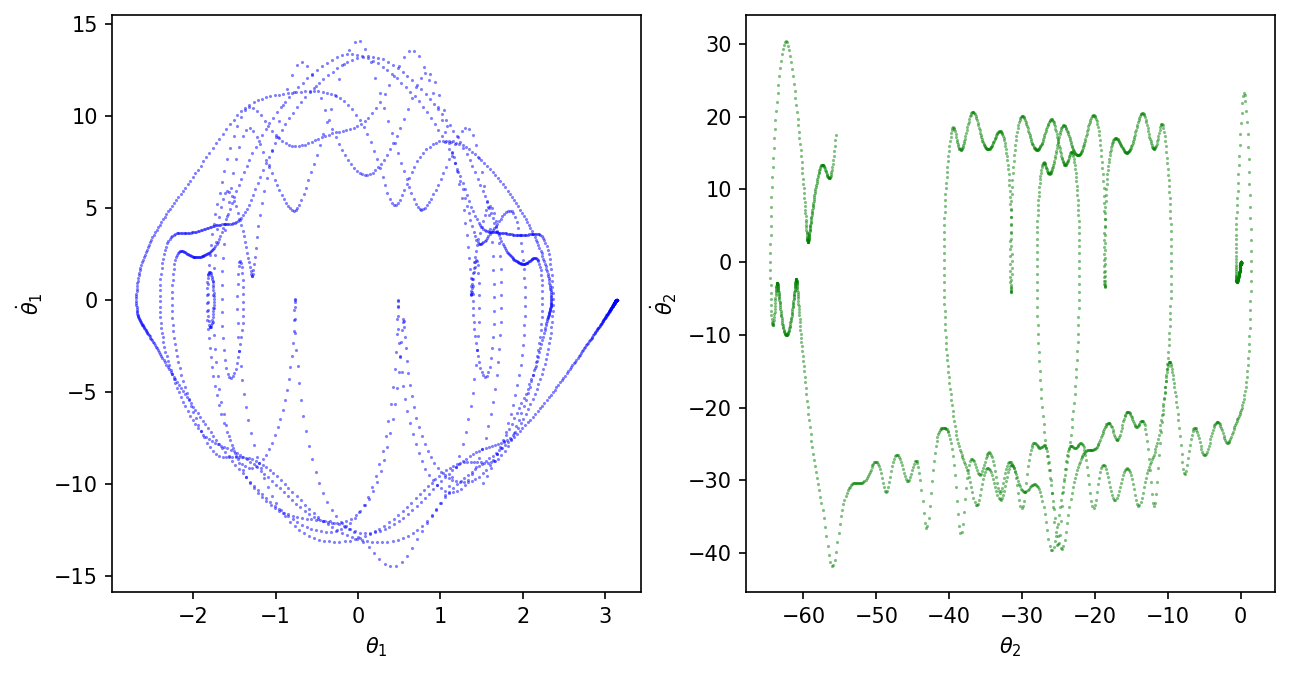

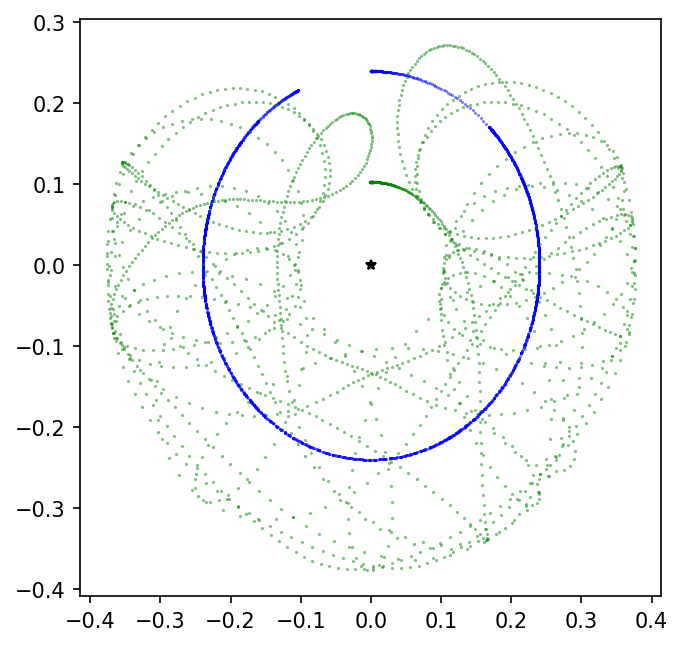

In [ ]:
#-------------------FOR CASE 1--------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import g

def rk4(y,t,h,derivs): #using rk4 method for solving the DE's of motions
    #function to implement rk4
    #y = [x,v] current state
    #t = current time
    #h = time step
    #derivs = derivative function that defines the problem
    k1,k2,k3,k4 = np.zeros(2),np.zeros(2),np.zeros(2),np.zeros(2)
    k1 = h*derivs(y,t)
    y_halfstep = y + k1/2. #Euler half step using k1
    k2 = h*derivs(y_halfstep,t+h/2)
    y_halfstep = y + k2/2. #Euler half step using k2
    k3 = h*derivs(y_halfstep,t+h/2)
    k4 = h*derivs(y + k3,t+h) #full step using k3
    y_next = y + (k1+2*k2+2*k3+k4)/6.
    return y_next

#Constants
m1 = 1.5753
m2 = 0.5753
L1 = 0.240
L2 = 0.137

theta_1_list = [90,60,30]
theta_2_list = [45,30,15]

#theta_1 = -0.107339, theta_2 = 0.69411
theta_1 = np.radians(180) #(-0.107339)
theta_2 = np.radians(1) #(-0.69441)

def motions(z, t):
    #z = [theta1, theta1dot, theta2, theta2dot]
    delta_theta = z[0] - z[2]
    zp = np.zeros(4)
    zp[0] = z[1]
    zp[1] = (m2*g*np.sin(z[2])*np.cos(delta_theta) - m2*np.sin(delta_theta)*(L1*z[1]**2*np.cos(delta_theta) + L2*z[3]**2) - (m1+m2)*g*np.sin(z[0])) / L1 / (m1 + m2*np.sin(delta_theta)**2)
    zp[2] = z[3]
    zp[3] = ((m1+m2)*(L1*z[1]**2*np.sin(delta_theta) - g*np.sin(z[2]) + g*np.sin(z[0])*np.cos(delta_theta)) + m2*L2*z[3]**2*np.sin(delta_theta)*np.cos(delta_theta)) / L2 / (m1 + m2*np.sin(delta_theta)**2)
    return zp

dt = 0.0047
tot_time = 3*np.pi
N = 2000#int(tot_time/dt)

#for n in range(theta_1_list):

f = open('Final_data_1.txt', 'w')
states = np.zeros((N,4))
times = np.arange(0,N,dt)
states[0,:] = [theta_1, 0.0, theta_2, 0.0]

for i in range(0, N-1):
  states[i+1,:] = rk4(states[i,:],times[i],dt,motions)
  rks=rk4(states[i,:],times[i],dt,motions)
  theta_1,thetadot_1,theta_2,thetadot_2=rks[0],rks[1],rks[2],rks[3]
  string = '%s\t%s\t%s\t%s\n' %(theta_1,thetadot_1,theta_2,thetadot_2)
  f.write(string)
f.close()

theta_1,thetadot_1,theta_2,thetadot_2 = np.genfromtxt('Final_data_1.txt', delimiter = '\t', comments = '#', unpack = True) #theta_number_trial

#transform into x and y values for visualization

x_1i = L1*np.cos(theta_1)
y_1i = L1 * np.sin(theta_1)
x_2i = L2*np.cos(theta_2) + x_1i
y_2i = L2*np.sin(theta_2) + y_1i
x_1 = L1*np.sin(theta_1)
y_1 = -L1*np.cos(theta_1)
x_2 = x_1 + L2*np.sin(theta_2)
y_2 = y_1 - L2*np.cos(theta_2)

fig = plt.figure(figsize=(10,5),dpi=150)
ax1 = fig.add_subplot(121)
ax1.plot(theta_1,thetadot_1,'b.',ms=1,alpha=0.5)
ax1.set_xlabel("$\\theta_1$")
ax1.set_ylabel("$\dot\\theta_1$")

ax2 = fig.add_subplot(122)
ax2.plot(theta_2,thetadot_2, 'g.', ms = 1, alpha = 0.5)
ax2.set_xlabel("$\\theta_2$")
ax2.set_ylabel("$\dot\\theta_2$")
plt.savefig('Phase_Space_thetas_11.png', bbox_inches = 'tight', dpi = 150)

originx, originy = 0,0
fig = plt.figure(figsize=(5,5),dpi=150)
ax = fig.add_subplot(111)
ax.plot(x_1,y_1, 'b.', ms = 1, alpha = 0.5, label = 'Mass 1 Trajectory')
ax.plot(x_2,y_2, 'g.', ms = 1, alpha =0.5, label = 'Mass 2 Trajectory')
ax.plot(originx,originy, color = 'black', marker = '*', ms = 5, label = 'Origin')
plt.savefig('DP_Case_1_traj_11.png', bbox_inches = 'tight', dpi = 150)

#can you make an animation?!


/content
/content/Case1


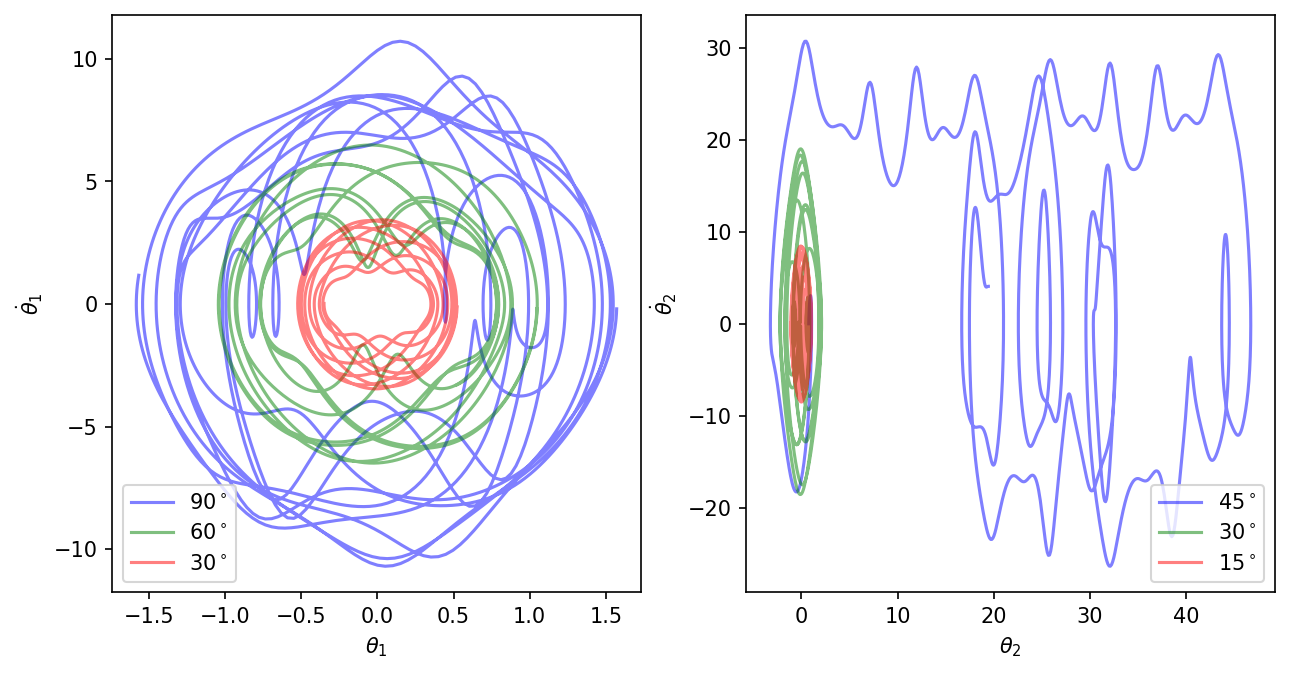

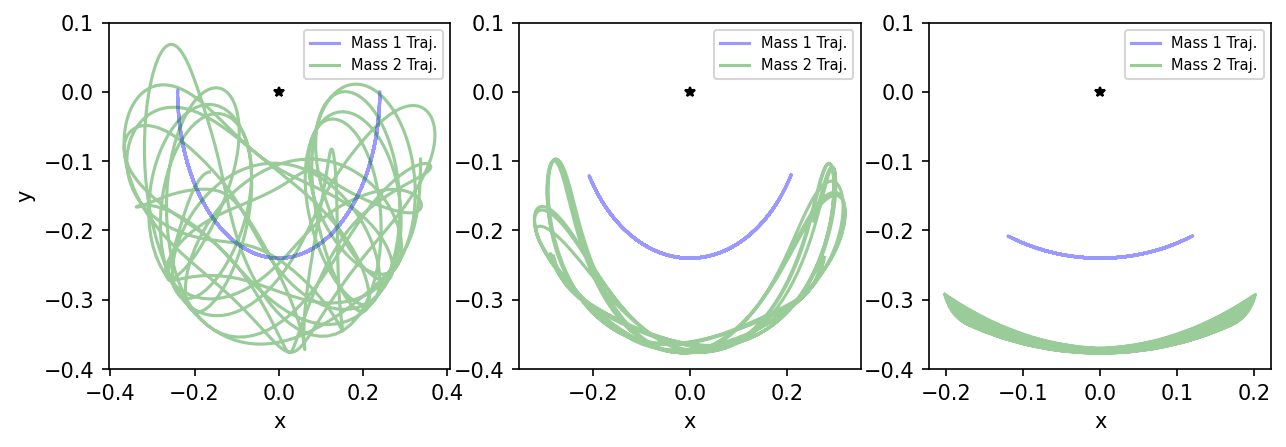

In [ ]:
%cd /content/
!mkdir Case1
%cd /content/Case1
#-------------------FOR TEST CASE 1--------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import g

def rk4(y,t,h,derivs): #using rk4 method for solving the DE's of motions
    #function to implement rk4
    #y = [x,v] current state
    #t = current time
    #h = time step
    #derivs = derivative function that defines the problem
    k1,k2,k3,k4 = np.zeros(2),np.zeros(2),np.zeros(2),np.zeros(2)
    k1 = h*derivs(y,t)
    y_halfstep = y + k1/2. #Euler half step using k1
    k2 = h*derivs(y_halfstep,t+h/2)
    y_halfstep = y + k2/2. #Euler half step using k2
    k3 = h*derivs(y_halfstep,t+h/2)
    k4 = h*derivs(y + k3,t+h) #full step using k3
    y_next = y + (k1+2*k2+2*k3+k4)/6.
    return y_next

#Constants
m1 = 1.5753
m2 = 0.5753
L1 = 0.240
L2 = 0.137

theta_1_list = np.radians(np.array([90,60,30]))
theta_2_list = np.radians(np.array([45,30,15]))

def motions(z, t):
    #z = [theta1, theta1dot, theta2, theta2dot]
    delta_theta = z[0] - z[2]
    zp = np.zeros(4)
    zp[0] = z[1]
    zp[1] = (m2*g*np.sin(z[2])*np.cos(delta_theta) - m2*np.sin(delta_theta)*(L1*z[1]**2*np.cos(delta_theta) + L2*z[3]**2) - (m1+m2)*g*np.sin(z[0])) / L1 / (m1 + m2*np.sin(delta_theta)**2)
    zp[2] = z[3]
    zp[3] = ((m1+m2)*(L1*z[1]**2*np.sin(delta_theta) - g*np.sin(z[2]) + g*np.sin(z[0])*np.cos(delta_theta)) + m2*L2*z[3]**2*np.sin(delta_theta)*np.cos(delta_theta)) / L2 / (m1 + m2*np.sin(delta_theta)**2)
    return zp

dt = 0.0047
tot_time = 3*np.pi
N = 2000#int(tot_time/dt)

for n in range(len(theta_1_list)):
  theta_1 = theta_1_list[n]
  theta_2 = theta_2_list[n]
  f = open(f"Final_data_[%i].txt" % n, 'w')
  states = np.zeros((N,4))
  times = np.arange(0,N,dt)
  states[0,:] = [theta_1, 0.0, theta_2, 0.0]

  for i in range(0, N-1):
    states[i+1,:] = rk4(states[i,:],times[i],dt,motions)
    rks=rk4(states[i,:],times[i],dt,motions)
    theta_1,thetadot_1,theta_2,thetadot_2=rks[0],rks[1],rks[2],rks[3]
    string = '%s\t%s\t%s\t%s\n' %(theta_1,thetadot_1,theta_2,thetadot_2,t)
    f.write(string)
  f.close()

theta_11,thetadot_11,theta_21,thetadot_21 = np.genfromtxt('Final_data_[0].txt', delimiter = '\t', comments = '#', unpack = True) #theta_number_trial
theta_12,thetadot_12,theta_22,thetadot_22 = np.genfromtxt('Final_data_[1].txt', delimiter = '\t', comments = '#', unpack = True)
theta_13,thetadot_13,theta_23,thetadot_23 = np.genfromtxt('Final_data_[2].txt', delimiter = '\t', comments = '#', unpack = True)

#transform into x and y values for visualization

x_11 = L1*np.sin(theta_11)
y_11 = -L1*np.cos(theta_11)
x_21 = x_11 + L2*np.sin(theta_21)
y_21 = y_11 - L2*np.cos(theta_21)

x_12 = L1*np.sin(theta_12)
y_12 = -L1*np.cos(theta_12)
x_22 = x_12 + L2*np.sin(theta_22)
y_22 = y_12 - L2*np.cos(theta_22)

x_13 = L1*np.sin(theta_13)
y_13 = -L1*np.cos(theta_13)
x_23 = x_13 + L2*np.sin(theta_23)
y_23 = y_13 - L2*np.cos(theta_23)

fig = plt.figure(figsize=(10,5),dpi=150)

ax1 = fig.add_subplot(121)
ax1.plot(theta_11,thetadot_11,'b-',ms=1,alpha=0.5)
ax1.set_xlabel("$\\theta_1$", fontsize = 10)
ax1.set_ylabel("$\dot\\theta_1$", fontsize = 10)
ax2 = fig.add_subplot(122)
ax2.plot(theta_21,thetadot_21, 'b-', ms = 1, alpha = 0.5)
ax2.set_xlabel("$\\theta_2$", fontsize = 10)
ax2.set_ylabel("$\dot\\theta_2$", fontsize = 10)

ax1.plot(theta_12,thetadot_12,'g-',ms=1,alpha=0.5)
ax2.plot(theta_22,thetadot_22, 'g-', ms = 1, alpha = 0.5)

ax1.plot(theta_13,thetadot_13,'r-',ms=1,alpha=0.5)
ax2.plot(theta_23,thetadot_23, 'r-', ms = 1, alpha = 0.5)
ax1.legend(['90$^\circ$','60$^\circ$', '30$^\circ$'], loc = 'lower left', fontsize = 10)
ax2.legend(['45$^\circ$','30$^\circ$', '15$^\circ$'], loc = 'best', fontsize = 10)
plt.savefig('Phase_Space_thetas.png', bbox_inches = 'tight', dpi = 150)


originx, originy = 0,0
fig = plt.figure(figsize=(10,3),dpi=150)
ax1 = fig.add_subplot(131)
ax1.plot(x_11,y_11, 'b-', ms = 1, alpha = 0.4, label = 'Mass 1 Trajectory')
ax1.plot(x_21,y_21, 'g-', ms = 1, alpha = 0.4, label = 'Mass 2 Trajectory')
ax1.plot(originx,originy, color = 'black', marker = '*', ms = 5, label = 'Origin')
ax1.set_ylim(-0.4,0.1)
ax1.set_xlabel('x', fontsize = 10)
ax1.set_ylabel('y', fontsize = 10)
ax1.legend(['Mass 1 Traj.', 'Mass 2 Traj.'], loc = 'best', fontsize = 7)

ax2 = fig.add_subplot(132)
ax2.plot(x_12,y_12, 'b-', ms = 1, alpha = 0.4, label = 'Mass 1 Trajectory')
ax2.plot(x_22,y_22, 'g-', ms = 1, alpha = 0.4, label = 'Mass 2 Trajectory')
ax2.plot(originx,originy, color = 'black', marker = '*', ms = 5, label = 'Origin')
ax2.set_ylim(-0.4,0.1)
ax2.set_xlabel('x', fontsize = 10)
ax2.legend(['Mass 1 Traj.', 'Mass 2 Traj.'], loc = 'best', fontsize = 7)

ax3 = fig.add_subplot(133)
ax3.plot(x_13,y_13, 'b-', ms = 1, alpha = 0.4, label = 'Mass 1 Trajectory')
ax3.plot(x_23,y_23, 'g-', ms = 1, alpha = 0.4, label = 'Mass 2 Trajectory')
ax3.plot(originx,originy, color = 'black', marker = '*', ms = 5, label = 'Origin')
ax3.set_ylim(-0.4,0.1)
ax3.set_xlabel('x', fontsize = 10)
ax3.legend(['Mass 1 Traj.', 'Mass 2 Traj.'], loc = 'best', fontsize = 7)

plt.savefig('DP_Case_1_traj_11.png', bbox_inches = 'tight', dpi = 150)


/content/Case2
1.5707963267948966
0.7853981633974483


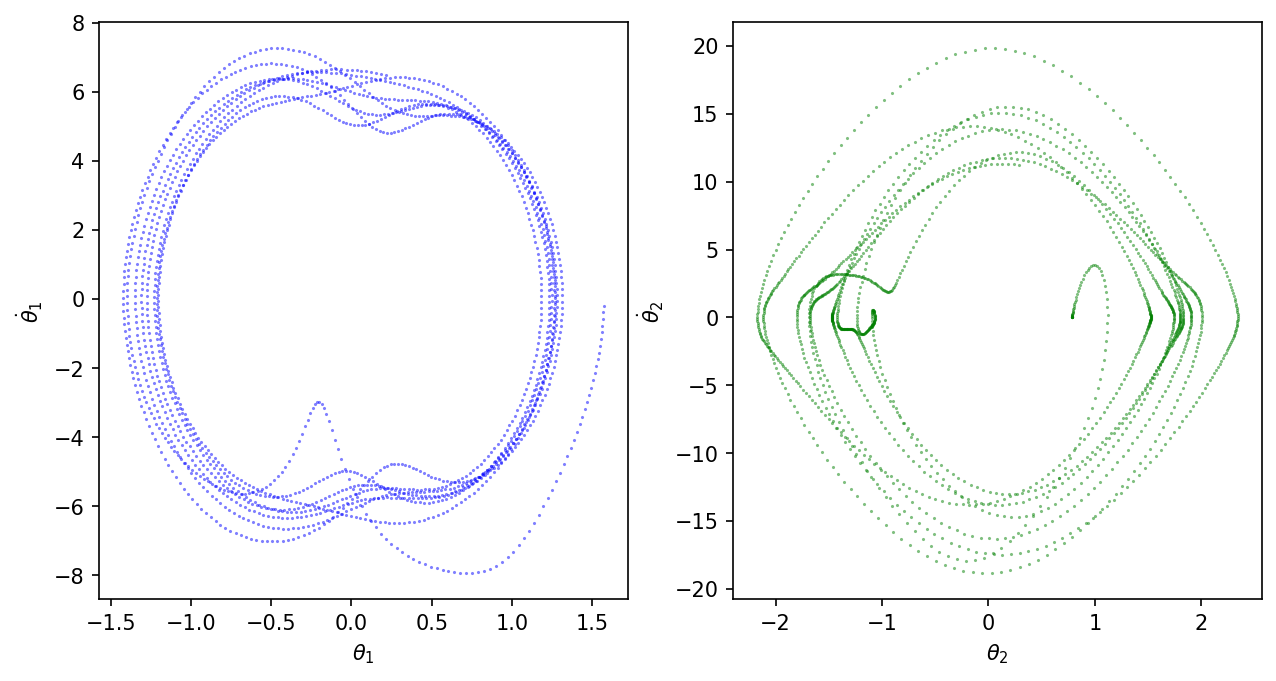

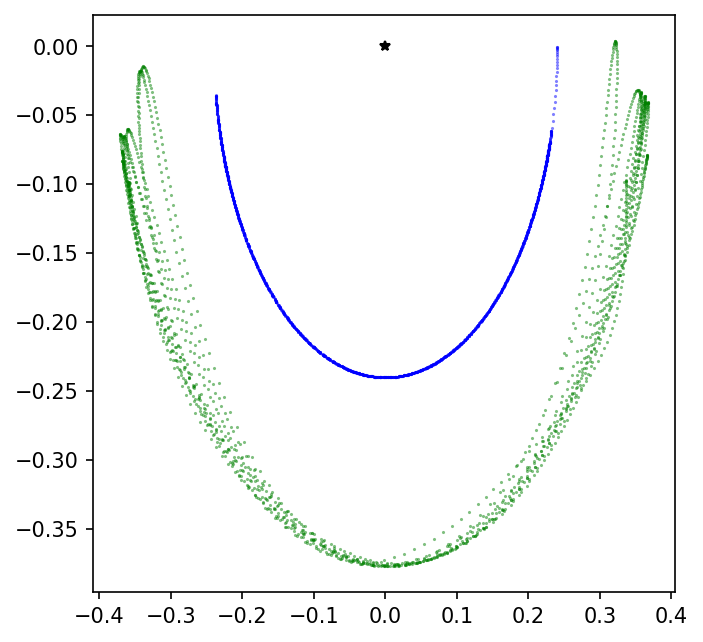

In [ ]:
%cd /content/Case2/
#-------------------FOR CASE 2--------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import g

def rk4(y,t,h,derivs): #using rk4 method for solving the DE's of motions
    #function to implement rk4
    #y = [x,v] current state
    #t = current time
    #h = time step
    #derivs = derivative function that defines the problem
    k1,k2,k3,k4 = np.zeros(2),np.zeros(2),np.zeros(2),np.zeros(2)
    k1 = h*derivs(y,t)
    y_halfstep = y + k1/2. #Euler half step using k1
    k2 = h*derivs(y_halfstep,t+h/2)
    y_halfstep = y + k2/2. #Euler half step using k2
    k3 = h*derivs(y_halfstep,t+h/2)
    k4 = h*derivs(y + k3,t+h) #full step using k3
    y_next = y + (k1+2*k2+2*k3+k4)/6.
    return y_next

t = np.linspace(0,3*np.pi,2000)

L1 = 0.240
L2 = 0.137
#m_1 = variable previously 1.5753
m2 = 0.5753 #0.2711 #previously 0.5753

lamb = 1
m_c = 0.2711
m_g = 0.3047

theta_1 = np.radians(90)#(-0.107339)#for one rotation 180.771
x_1i = L1*np.cos(theta_1)
y_1i = L1 * np.sin(theta_1)
theta_2 = np.radians(45)#(-0.69441)
x_2i = L2*np.cos(theta_2) + x_1i
y_2i = L2*np.sin(theta_2) + y_1i


def m1(t):
  return m_c + m_g*(1+lamb*t) #m_c is mass of the container, m_g is the mass of a grain, lamb is the velocity at which m_g is exiting the containter

def motions(z, t):
    #z = [theta1, theta1dot, theta2, theta2dot]
    delta_theta = z[0] - z[2]
    zp = np.zeros(4)
    zp[0] = z[1]
    zp[1] = (m2*g*np.sin(z[2])*np.cos(delta_theta) - m2*np.sin(delta_theta)*(L1*z[1]**2*np.cos(delta_theta) + L2*z[3]**2) - (m1(t)+m2)*g*np.sin(z[0])) / L1 / (m1(t) + m2*np.sin(delta_theta)**2)
    zp[2] = z[3]
    zp[3] = ((m1(t)+m2)*(L1*z[1]**2*np.sin(delta_theta) - g*np.sin(z[2]) + g*np.sin(z[0])*np.cos(delta_theta)) + m2*L2*z[3]**2*np.sin(delta_theta)*np.cos(delta_theta)) / L2 / (m1(t) + m2*np.sin(delta_theta)**2)
    return zp
'''
def motions(z,t):
  #z = [theta_1, theta_1_dot, theta_2, theta_2_dot]
  zp = np.zeros(4)
  delta_theta = z[0]-z[2]
  zp[0] = z[1]
  num = np.zeros(4)
  num[0] = -g*m_1(t)*np.sin(z[0])
  num[1] = -g*m_2*np.sin(delta_theta)*np.cos(z[2])
  num[2] = -np.cos(delta_theta)*np.sin(delta_theta)*L_1*m_2*(z[1])**2
  num[3] = -np.sin(delta_theta)*L_2*m_2*(z[3])**2
  zp[1] = np.sum(num)/(L_1*(m_1(t) + m_2*np.sin(delta_theta)**2))
  zp[2] = z[3]
  num[0] = m_1(t)*(g*np.cos(z[0])+L_1*z[1]**2)
  num[1] = m_2*(g*np.cos(z[0])+L_1*z[1]**2+np.cos(delta_theta)*L_2*z[3]**2)
  zp[3] = np.sin(delta_theta) * np.sum(num)/ (L_2*(m_1(t) + m_2*np.sin(delta_theta)**2))
  return zp
'''
dt = 0.0047
tot_time = 3*np.pi
N = 2000 #int(tot_time/dt)

f = open('Final_data_case_2.txt', 'w')
states = np.zeros((N,4))
times = np.arange(0,N,dt)
print(theta_1)
print(theta_2)
states[0,:] = [theta_1, 0.0, theta_2, 0.0]

for i in range(0, N-1):
  states[i+1,:] = rk4(states[i,:],times[i],dt,motions)
  rks=rk4(states[i,:],times[i],dt,motions)
  theta_1,thetadot_1,theta_2,thetadot_2=rks[0],rks[1],rks[2],rks[3]
  string = '%s\t%s\t%s\t%s\n' %(theta_1,thetadot_1,theta_2,thetadot_2)
  f.write(string)
f.close()

theta_1,thetadot_1,theta_2,thetadot_2 = np.genfromtxt('Final_data_case_2.txt', delimiter = '\t', comments = '#', unpack = True)

fig = plt.figure(figsize=(10,5),dpi=150)
ax1 = fig.add_subplot(121)
ax1.plot(theta_1,thetadot_1,'b.',ms=1,alpha=0.5)
ax1.set_xlabel("$\\theta_1$")
ax1.set_ylabel("$\dot\\theta_1$")
ax2 = fig.add_subplot(122)
ax2.plot(theta_2,thetadot_2, 'g.', ms = 1, alpha = 0.5)
ax2.set_xlabel("$\\theta_2$")
ax2.set_ylabel("$\dot\\theta_2$")
plt.savefig('Phase_Space_thetas.png', bbox_inches = 'tight', dpi = 150)

x_1 = L1*np.sin(theta_1)
y_1 = -L1*np.cos(theta_1)
x_2 = x_1 + L2*np.sin(theta_2)
y_2 = y_1 - L2*np.cos(theta_2)

originx, originy = 0,0

fig = plt.figure(figsize=(5,5),dpi=150)
ax = fig.add_subplot(111)
ax.plot(x_1,y_1, 'b.', ms = 1, alpha = 0.5, label = 'Mass 1 Trajectory')
ax.plot(x_2,y_2, 'g.', ms = 1, alpha = 0.5, label = 'Mass 2 Trajectory')
ax.plot(originx,originy, color = 'black', marker = '*', ms = 5, label = 'Origin')
plt.savefig('DP_Case_2_traj.png', bbox_inches = 'tight', dpi = 150)


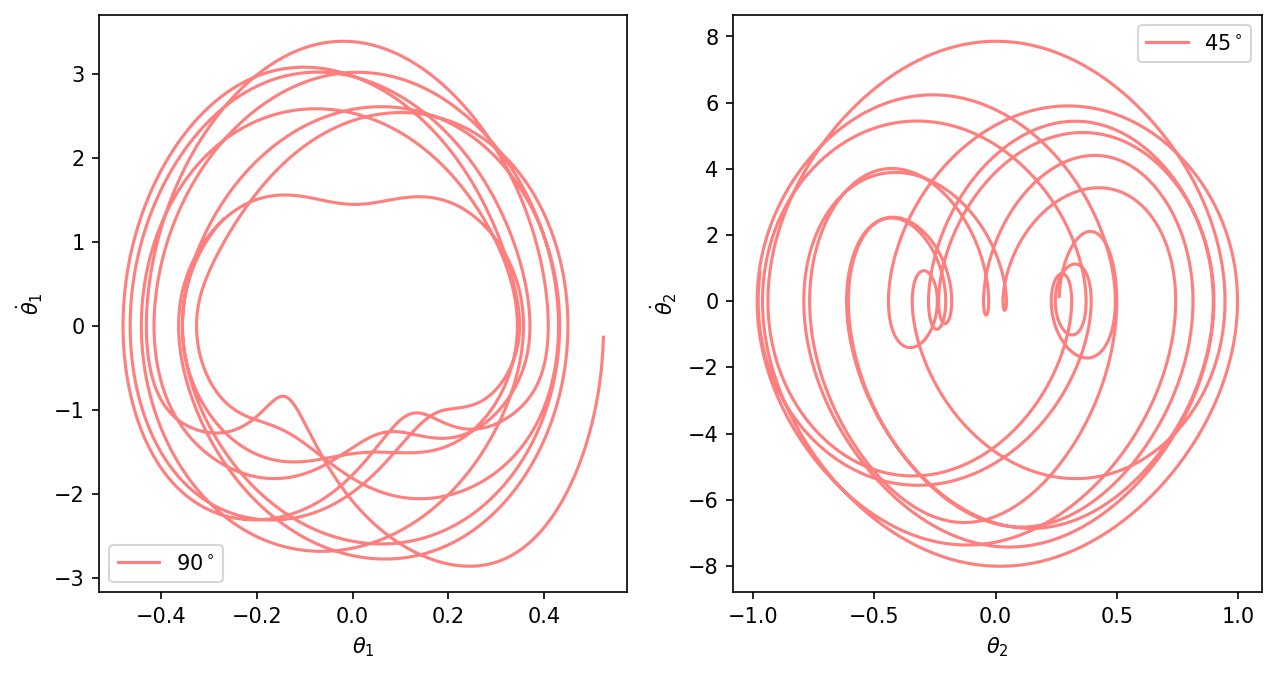

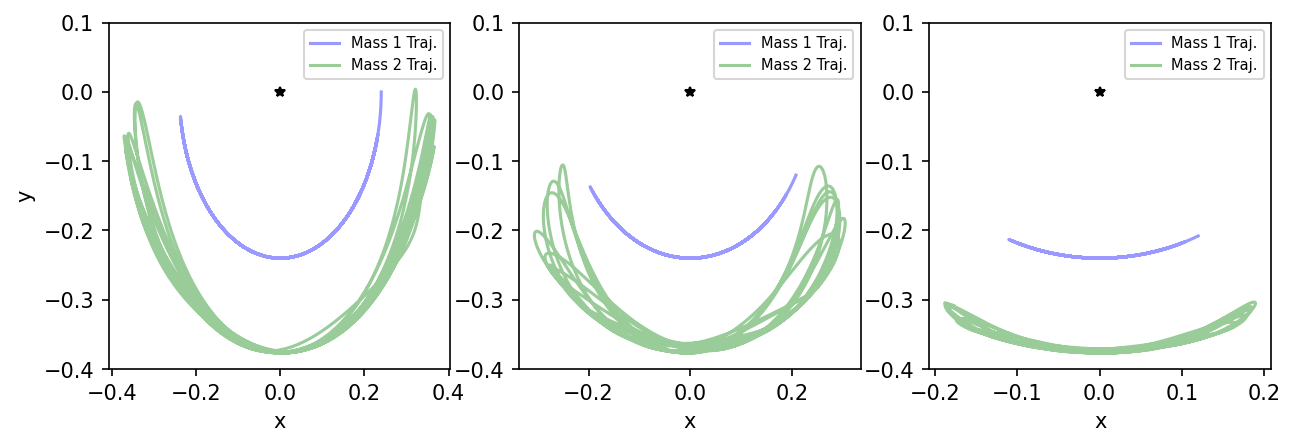

In [ ]:
%cd /content/
!mkdir Case2
%cd /content/Case2
#------------------------FOR CASE 2 TRIALS--------------------------------------
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import g

def rk4(y,t,h,derivs): #using rk4 method for solving the DE's of motions
    #function to implement rk4
    #y = [x,v] current state
    #t = current time
    #h = time step
    #derivs = derivative function that defines the problem
    k1,k2,k3,k4 = np.zeros(2),np.zeros(2),np.zeros(2),np.zeros(2)
    k1 = h*derivs(y,t)
    y_halfstep = y + k1/2. #Euler half step using k1
    k2 = h*derivs(y_halfstep,t+h/2)
    y_halfstep = y + k2/2. #Euler half step using k2
    k3 = h*derivs(y_halfstep,t+h/2)
    k4 = h*derivs(y + k3,t+h) #full step using k3
    y_next = y + (k1+2*k2+2*k3+k4)/6.
    return y_next


L1 = 0.240
L2 = 0.137
#m_1 = variable previously 1.5753
m2 = 0.5753

lamb = 1
m_c = 0.2711
m_g = 0.3047
t = np.linspace(0,3*np.pi,2000)

theta_1_list = np.radians(np.array([90,60,30]))
theta_2_list = np.radians(np.array([45,30,15]))

def m1(t):
  return m_c + m_g*(1+lamb*t) #m_c is mass of the container, m_g is the mass of a grain, lamb is the velocity at which m_g is exiting the containter

def motions(z, t):
    #z = [theta1, theta1dot, theta2, theta2dot]
    delta_theta = z[0] - z[2]
    zp = np.zeros(4)
    zp[0] = z[1]
    zp[1] = (m2*g*np.sin(z[2])*np.cos(delta_theta) - m2*np.sin(delta_theta)*(L1*z[1]**2*np.cos(delta_theta) + L2*z[3]**2) - (m1(t)+m2)*g*np.sin(z[0])) / L1 / (m1(t) + m2*np.sin(delta_theta)**2)
    zp[2] = z[3]
    zp[3] = ((m1(t)+m2)*(L1*z[1]**2*np.sin(delta_theta) - g*np.sin(z[2]) + g*np.sin(z[0])*np.cos(delta_theta)) + m2*L2*z[3]**2*np.sin(delta_theta)*np.cos(delta_theta)) / L2 / (m1(t) + m2*np.sin(delta_theta)**2)
    return zp

for n in range(len(theta_1_list)):
  theta_1 = theta_1_list[n]
  theta_2 = theta_2_list[n]
  f = open(f"Final_data_[%i].txt" % n, 'w')
  states = np.zeros((N,4))
  times = np.arange(0,N,dt)
  states[0,:] = [theta_1, 0.0, theta_2, 0.0]

  for i in range(0, N-1):
    states[i+1,:] = rk4(states[i,:],times[i],dt,motions)
    rks=rk4(states[i,:],times[i],dt,motions)
    theta_1,thetadot_1,theta_2,thetadot_2=rks[0],rks[1],rks[2],rks[3]
    string = '%s\t%s\t%s\t%s\n' %(theta_1,thetadot_1,theta_2,thetadot_2)
    f.write(string)
  f.close()

theta_11,thetadot_11,theta_21,thetadot_21 = np.genfromtxt('Final_data_[0].txt', delimiter = '\t', comments = '#', unpack = True) #theta_number_trial
theta_12,thetadot_12,theta_22,thetadot_22 = np.genfromtxt('Final_data_[1].txt', delimiter = '\t', comments = '#', unpack = True)
theta_13,thetadot_13,theta_23,thetadot_23 = np.genfromtxt('Final_data_[2].txt', delimiter = '\t', comments = '#', unpack = True)

x_11 = L1*np.sin(theta_11)
y_11 = -L1*np.cos(theta_11)
x_21 = x_11 + L2*np.sin(theta_21)
y_21 = y_11 - L2*np.cos(theta_21)

x_12 = L1*np.sin(theta_12)
y_12 = -L1*np.cos(theta_12)
x_22 = x_12 + L2*np.sin(theta_22)
y_22 = y_12 - L2*np.cos(theta_22)

x_13 = L1*np.sin(theta_13)
y_13 = -L1*np.cos(theta_13)
x_23 = x_13 + L2*np.sin(theta_23)
y_23 = y_13 - L2*np.cos(theta_23)

fig = plt.figure(figsize=(10,5),dpi=150)
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.plot(theta_11,thetadot_11,'b-',ms=1,alpha=0.5)
ax1.set_xlabel("$\\theta_1$", fontsize = 10)
ax1.set_ylabel("$\dot\\theta_1$", fontsize = 10)
ax2.plot(theta_21,thetadot_21, 'b-', ms = 1, alpha = 0.5)
ax2.set_xlabel("$\\theta_2$")
ax2.set_ylabel("$\dot\\theta_2$")

ax1.plot(theta_12,thetadot_12,'g-',ms=1,alpha=0.5)
ax2.plot(theta_22,thetadot_22, 'g-', ms = 1, alpha = 0.5)

ax1.plot(theta_13,thetadot_13,'r-',ms=1,alpha=0.5)
ax2.plot(theta_23,thetadot_23, 'r-', ms = 1, alpha = 0.5)
ax1.legend(['90$^\circ$','60$^\circ$', '30$^\circ$'], loc = 'lower left', fontsize = 10)
ax2.legend(['45$^\circ$', '30$^\circ$', '15$^\circ$'], loc = 'best', fontsize = 10)
plt.savefig('Phase_Space_thetas.png', bbox_inches = 'tight', dpi = 150)

originx, originy = 0,0
fig = plt.figure(figsize=(10,3),dpi=150)
ax1 = fig.add_subplot(131)
ax1.plot(x_11,y_11, 'b-', ms = 1, alpha = 0.4, label = 'Mass 1 Trajectory')
ax1.plot(x_21,y_21, 'g-', ms = 1, alpha = 0.4, label = 'Mass 2 Trajectory')
ax1.plot(originx,originy, color = 'black', marker = '*', ms = 5, label = 'Origin')
ax1.set_ylim(-0.4,0.1)
ax1.set_xlabel('x', fontsize = 10)
ax1.set_ylabel('y', fontsize = 10)
ax1.legend(['Mass 1 Traj.', 'Mass 2 Traj.'], loc = 'best', fontsize = 7)

ax2 = fig.add_subplot(132)
ax2.plot(x_12,y_12, 'b-', ms = 1, alpha = 0.4, label = 'Mass 1 Trajectory')
ax2.plot(x_22,y_22, 'g-', ms = 1, alpha = 0.4, label = 'Mass 2 Trajectory')
ax2.plot(originx,originy, color = 'black', marker = '*', ms = 5, label = 'Origin')
ax2.set_ylim(-0.4,0.1)
ax2.set_xlabel('x', fontsize = 10)
ax2.legend(['Mass 1 Traj.', 'Mass 2 Traj.'], loc = 'best', fontsize = 7)

ax3 = fig.add_subplot(133)
ax3.plot(x_13,y_13, 'b-', ms = 1, alpha = 0.4, label = 'Mass 1 Trajectory')
ax3.plot(x_23,y_23, 'g-', ms = 1, alpha = 0.4, label = 'Mass 2 Trajectory')
ax3.plot(originx,originy, color = 'black', marker = '*', ms = 5, label = 'Origin')
ax3.set_ylim(-0.4,0.1)
ax3.set_xlabel('x', fontsize = 10)
ax3.legend(['Mass 1 Traj.', 'Mass 2 Traj.'], loc = 'best', fontsize = 7)

plt.savefig('DP_Case_1_traj_11.png', bbox_inches = 'tight', dpi = 150)


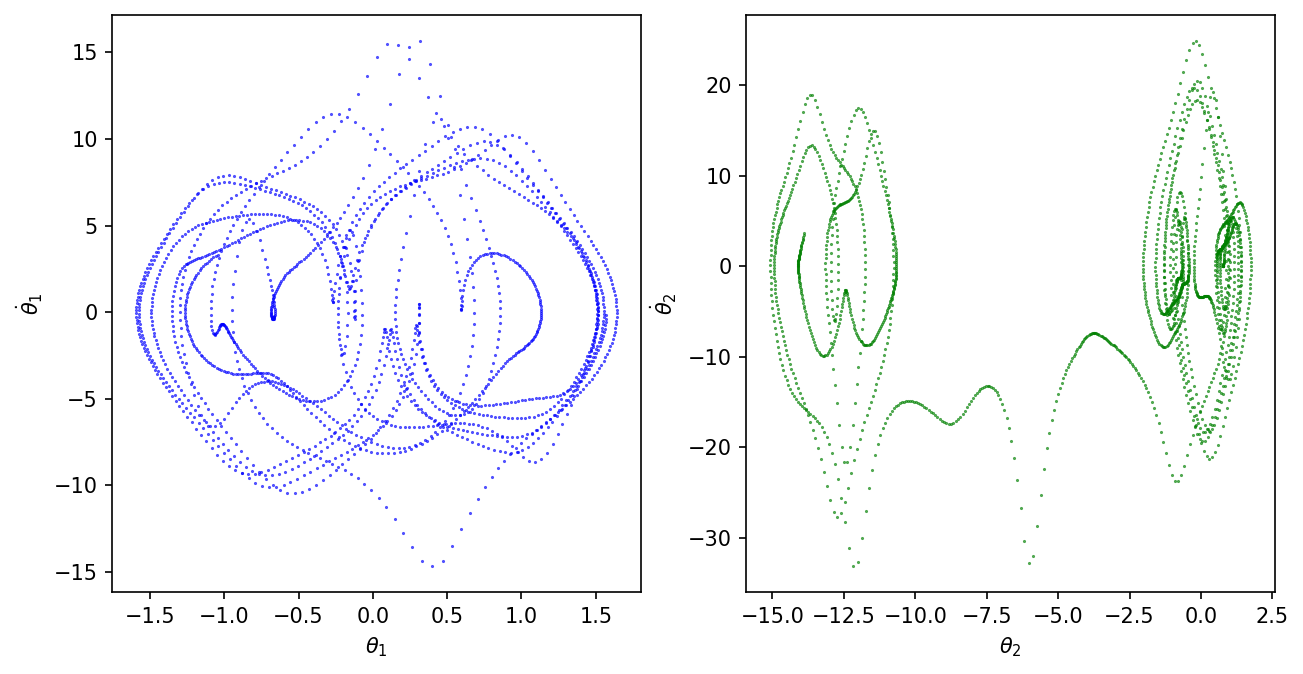

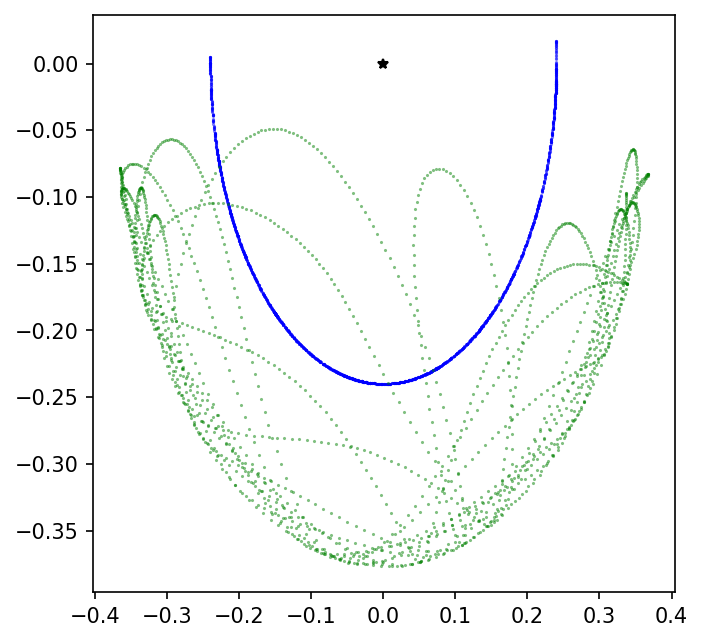

In [ ]:
#-------------------------FOR CASE 3--------------------------------------------
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import g

def rk4(y,t,h,derivs): #using rk4 method for solving the DE's of motions
    #function to implement rk4
    #y = [x,v] current state
    #t = current time
    #h = time step
    #derivs = derivative function that defines the problem
    k1,k2,k3,k4 = np.zeros(2),np.zeros(2),np.zeros(2),np.zeros(2)
    k1 = h*derivs(y,t)
    y_halfstep = y + k1/2. #Euler half step using k1
    k2 = h*derivs(y_halfstep,t+h/2)
    y_halfstep = y + k2/2. #Euler half step using k2
    k3 = h*derivs(y_halfstep,t+h/2)
    k4 = h*derivs(y + k3,t+h) #full step using k3
    y_next = y + (k1+2*k2+2*k3+k4)/6.
    return y_next

t = np.linspace(0,3*np.pi,2000)

L1 = 0.240
L2 = 0.137
m1 = 1.5753
#m_2 = variable, previously 0.2711

lamb = 1
m_c = 1.5753
m_g = 0.3047

theta_1 = np.radians(90)#(-0.107339)
x_1i = L1*np.cos(theta_1)
y_1i = L1 * np.sin(theta_1)
theta_2 = np.radians(45)#(-0.69441)
x_2i = L2*np.cos(theta_2) + x_1i
y_2i = L2*np.sin(theta_2) + y_1i

def m2(t):
  return m_c + m_g*(np.sin(2*np.pi*t))

def motions(z, t):
    #z = [theta1, theta1dot, theta2, theta2dot]
    delta_theta = z[0] - z[2]
    zp = np.zeros(4)
    zp[0] = z[1]
    zp[1] = (m2(t)*g*np.sin(z[2])*np.cos(delta_theta) - m2(t)*np.sin(delta_theta)*(L1*z[1]**2*np.cos(delta_theta) + L2*z[3]**2) - (m1+m2(t))*g*np.sin(z[0])) / L1 / (m1 + m2(t)*np.sin(delta_theta)**2)
    zp[2] = z[3]
    zp[3] = ((m1+m2(t))*(L1*z[1]**2*np.sin(delta_theta) - g*np.sin(z[2]) + g*np.sin(z[0])*np.cos(delta_theta)) + m2(t)*L2*z[3]**2*np.sin(delta_theta)*np.cos(delta_theta)) / L2 / (m1 + m2(t)*np.sin(delta_theta)**2)
    return zp

#m_1 = np.sin() #what if we had it as a mass that chnages with time like a sin funciton

dt = 0.0047
tot_time = 3*np.pi
N = 2000 #int(tot_time/dt)

f = open('Final_data_case_3.txt', 'w')
states = np.zeros((N,4))
times = np.arange(0,N,dt)
states[0,:] = [theta_1, 0.0, theta_2, 0.0]

for i in range(0, N-1):
  states[i+1,:] = rk4(states[i,:],times[i],dt,motions)
  rks=rk4(states[i,:],times[i],dt,motions)
  theta_1,thetadot_1,theta_2,thetadot_2=rks[0],rks[1],rks[2],rks[3]
  string = '%s\t%s\t%s\t%s\n' %(theta_1,thetadot_1,theta_2,thetadot_2)
  f.write(string)
f.close()

theta_1,thetadot_1,theta_2,thetadot_2 = np.genfromtxt('Final_data_case_3.txt', delimiter = '\t', comments = '#', unpack = True)

fig = plt.figure(figsize=(10,5),dpi=150)
ax1 = fig.add_subplot(121)
ax1.plot(theta_1,thetadot_1,'b.',ms=1,alpha=0.7)
ax1.set_xlabel("$\\theta_1$")
ax1.set_ylabel("$\dot\\theta_1$")
ax2 = fig.add_subplot(122)
ax2.plot(theta_2,thetadot_2, 'g.', ms = 1, alpha = 0.7)
ax2.set_xlabel("$\\theta_2$")
ax2.set_ylabel("$\dot\\theta_2$")
plt.savefig('Phase_Space_thetas.png', bbox_inches = 'tight', dpi = 150)

x_1 = L1*np.sin(theta_1)
y_1 = -L1*np.cos(theta_1)
x_2 = x_1 + L2*np.sin(theta_2)
y_2 = y_1 - L2*np.cos(theta_2)

originx, originy = 0,0

fig = plt.figure(figsize=(5,5),dpi=150)
ax = fig.add_subplot(111)
ax.plot(x_1,y_1, 'b.', ms = 1, alpha = 0.5, label = 'Mass 1 Trajectory')
ax.plot(x_2,y_2, 'g.', ms = 1, alpha = 0.5, label = 'Mass 2 Trajectory')
ax.plot(originx,originy, color = 'black', marker = '*', ms = 5, label = 'Origin')
plt.savefig('DP_Case_3_traj.png', bbox_inches = 'tight', dpi = 150)


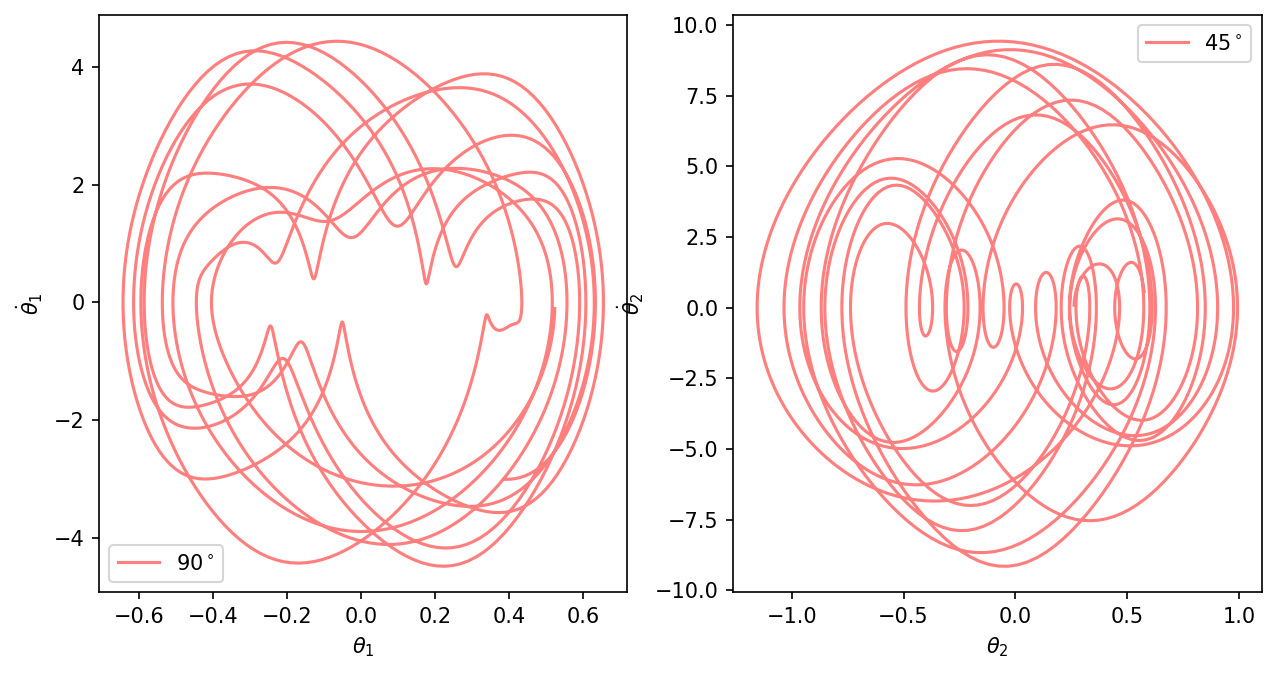

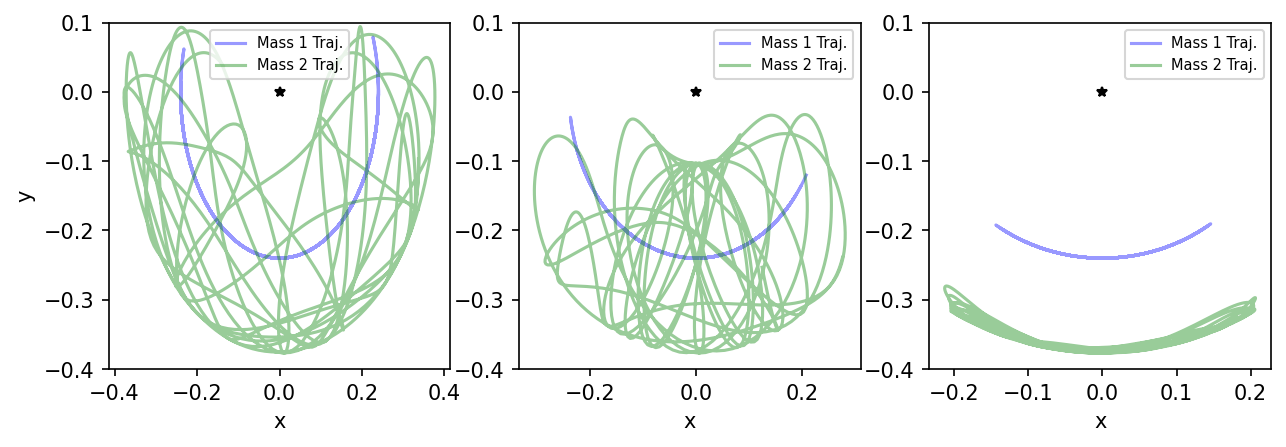

In [ ]:
%cd /content/
!mkdir Case3
%cd /content/Case3
#------------------------FOR TRIAL CASE 3-------------------------------------------
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import g

def rk4(y,t,h,derivs): #using rk4 method for solving the DE's of motions
    #function to implement rk4
    #y = [x,v] current state
    #t = current time
    #h = time step
    #derivs = derivative function that defines the problem
    k1,k2,k3,k4 = np.zeros(2),np.zeros(2),np.zeros(2),np.zeros(2)
    k1 = h*derivs(y,t)
    y_halfstep = y + k1/2. #Euler half step using k1
    k2 = h*derivs(y_halfstep,t+h/2)
    y_halfstep = y + k2/2. #Euler half step using k2
    k3 = h*derivs(y_halfstep,t+h/2)
    k4 = h*derivs(y + k3,t+h) #full step using k3
    y_next = y + (k1+2*k2+2*k3+k4)/6.
    return y_next

t = np.linspace(0,3*np.pi,2000)

L1 = 0.240
L2 = 0.137
m1 = 1.5753
#m_2 = variable, previously 0.5753

lamb = 1
m_c = 0.2711
m_g = 0.3047

theta_1_list = np.radians(np.array([90,60,30]))
theta_2_list = np.radians(np.array([45,30,15]))

def m2(t):
  return m_c + m_g*(lamb*t)

def motions(z, t):
    #z = [theta1, theta1dot, theta2, theta2dot]
    delta_theta = z[0] - z[2]
    zp = np.zeros(4)
    zp[0] = z[1]
    zp[1] = (m2(t)*g*np.sin(z[2])*np.cos(delta_theta) - m2(t)*np.sin(delta_theta)*(L1*z[1]**2*np.cos(delta_theta) + L2*z[3]**2) - (m1+m2(t))*g*np.sin(z[0])) / L1 / (m1 + m2(t)*np.sin(delta_theta)**2)
    zp[2] = z[3]
    zp[3] = ((m1+m2(t))*(L1*z[1]**2*np.sin(delta_theta) - g*np.sin(z[2]) + g*np.sin(z[0])*np.cos(delta_theta)) + m2(t)*L2*z[3]**2*np.sin(delta_theta)*np.cos(delta_theta)) / L2 / (m1 + m2(t)*np.sin(delta_theta)**2)
    return zp

dt = 0.0047
tot_time = 3*np.pi
N = 2000 #int(tot_time/dt)

for n in range(len(theta_1_list)):
  theta_1 = theta_1_list[n]
  theta_2 = theta_2_list[n]
  f = open(f"Final_data_[%i].txt" % n, 'w')
  states = np.zeros((N,4))
  times = np.arange(0,N,dt)
  states[0,:] = [theta_1, 0.0, theta_2, 0.0]

  for i in range(0, N-1):
    states[i+1,:] = rk4(states[i,:],times[i],dt,motions)
    rks=rk4(states[i,:],times[i],dt,motions)
    theta_1,thetadot_1,theta_2,thetadot_2=rks[0],rks[1],rks[2],rks[3]
    string = '%s\t%s\t%s\t%s\n' %(theta_1,thetadot_1,theta_2,thetadot_2)
    f.write(string)
  f.close()

theta_11,thetadot_11,theta_21,thetadot_21 = np.genfromtxt('Final_data_[0].txt', delimiter = '\t', comments = '#', unpack = True) #theta_number_trial
theta_12,thetadot_12,theta_22,thetadot_22 = np.genfromtxt('Final_data_[1].txt', delimiter = '\t', comments = '#', unpack = True)
theta_13,thetadot_13,theta_23,thetadot_23 = np.genfromtxt('Final_data_[2].txt', delimiter = '\t', comments = '#', unpack = True)

x_11 = L1*np.sin(theta_11)
y_11 = -L1*np.cos(theta_11)
x_21 = x_11 + L2*np.sin(theta_21)
y_21 = y_11 - L2*np.cos(theta_21)

x_12 = L1*np.sin(theta_12)
y_12 = -L1*np.cos(theta_12)
x_22 = x_12 + L2*np.sin(theta_22)
y_22 = y_12 - L2*np.cos(theta_22)

x_13 = L1*np.sin(theta_13)
y_13 = -L1*np.cos(theta_13)
x_23 = x_13 + L2*np.sin(theta_23)
y_23 = y_13 - L2*np.cos(theta_23)

fig = plt.figure(figsize=(10,5),dpi=150)
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.plot(theta_11,thetadot_11,'b-',ms=1,alpha=0.5)
ax1.set_xlabel("$\\theta_1$", fontsize = 10)
ax1.set_ylabel("$\dot\\theta_1$", fontsize = 10)
ax2.plot(theta_21,thetadot_21, 'b-', ms = 1, alpha = 0.5)
ax2.set_xlabel("$\\theta_2$")
ax2.set_ylabel("$\dot\\theta_2$")

ax1.plot(theta_12,thetadot_12,'g-',ms=1,alpha=0.5)
ax2.plot(theta_22,thetadot_22, 'g-', ms = 1, alpha = 0.5)

ax1.plot(theta_13,thetadot_13,'r-',ms=1,alpha=0.5)
ax2.plot(theta_23,thetadot_23, 'r-', ms = 1, alpha = 0.5)
ax1.legend(['90$^\circ$','60$^\circ$', '30$^\circ$'], loc = 'lower left', fontsize = 10)
ax2.legend(['45$^\circ$', '30$^\circ$', '15$^\circ$'], loc = 'best', fontsize = 10)
plt.savefig('Phase_Space_thetas.png', bbox_inches = 'tight', dpi = 150)

originx, originy = 0,0
fig = plt.figure(figsize=(10,3),dpi=150)
ax1 = fig.add_subplot(131)
ax1.plot(x_11,y_11, 'b-', ms = 1, alpha = 0.4, label = 'Mass 1 Trajectory')
ax1.plot(x_21,y_21, 'g-', ms = 1, alpha = 0.4, label = 'Mass 2 Trajectory')
ax1.plot(originx,originy, color = 'black', marker = '*', ms = 5, label = 'Origin')
ax1.set_ylim(-0.4,0.1)
ax1.set_xlabel('x', fontsize = 10)
ax1.set_ylabel('y', fontsize = 10)
ax1.legend(['Mass 1 Traj.', 'Mass 2 Traj.'], loc = 'best', fontsize = 7)

ax2 = fig.add_subplot(132)
ax2.plot(x_12,y_12, 'b-', ms = 1, alpha = 0.4, label = 'Mass 1 Trajectory')
ax2.plot(x_22,y_22, 'g-', ms = 1, alpha = 0.4, label = 'Mass 2 Trajectory')
ax2.plot(originx,originy, color = 'black', marker = '*', ms = 5, label = 'Origin')
ax2.set_ylim(-0.4,0.1)
ax2.set_xlabel('x', fontsize = 10)
ax2.legend(['Mass 1 Traj.', 'Mass 2 Traj.'], loc = 'best', fontsize = 7)

ax3 = fig.add_subplot(133)
ax3.plot(x_13,y_13, 'b-', ms = 1, alpha = 0.4, label = 'Mass 1 Trajectory')
ax3.plot(x_23,y_23, 'g-', ms = 1, alpha = 0.4, label = 'Mass 2 Trajectory')
ax3.plot(originx,originy, color = 'black', marker = '*', ms = 5, label = 'Origin')
ax3.set_ylim(-0.4,0.1)
ax3.set_xlabel('x', fontsize = 10)
ax3.legend(['Mass 1 Traj.', 'Mass 2 Traj.'], loc = 'best', fontsize = 7)

plt.savefig('DP_Case_1_traj_11.png', bbox_inches = 'tight', dpi = 150)


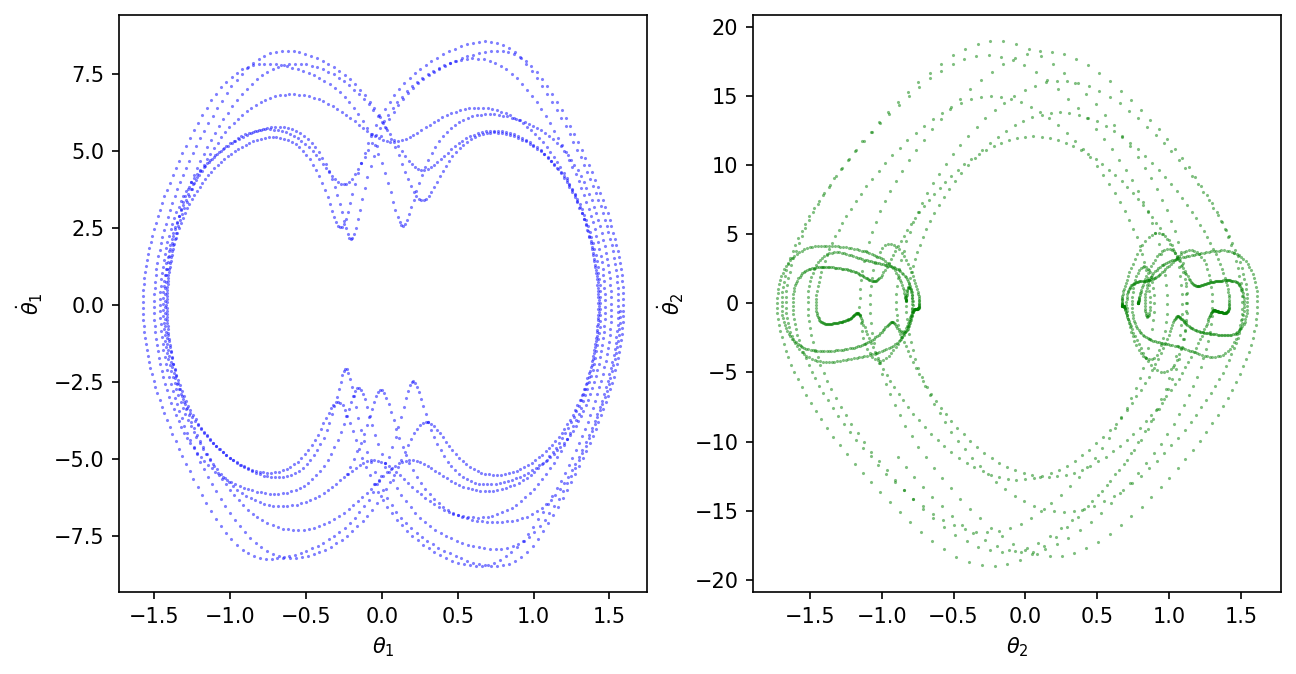

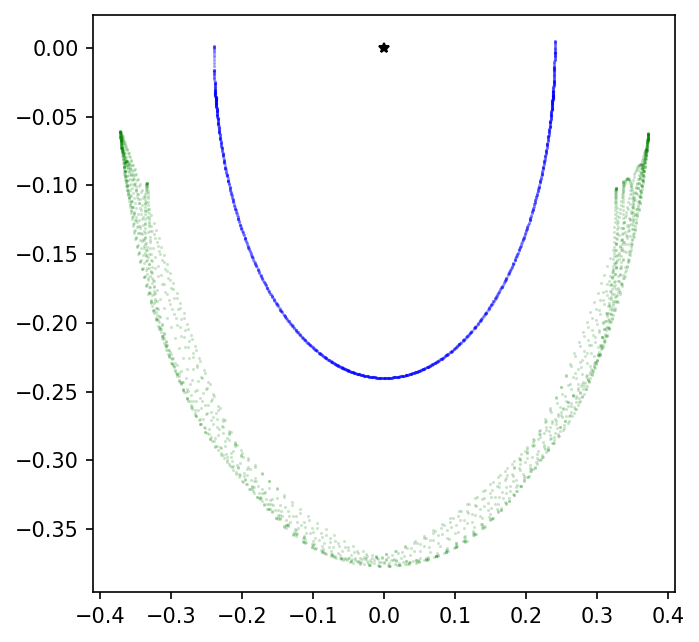

In [ ]:
#-----------FOR CASE 4----------------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import g

def rk4(y,t,h,derivs): #using rk4 method for solving the DE's of motions
    #function to implement rk4
    #y = [x,v] current state
    #t = current time
    #h = time step
    #derivs = derivative function that defines the problem
    k1,k2,k3,k4 = np.zeros(2),np.zeros(2),np.zeros(2),np.zeros(2)
    k1 = h*derivs(y,t)
    y_halfstep = y + k1/2. #Euler half step using k1
    k2 = h*derivs(y_halfstep,t+h/2)
    y_halfstep = y + k2/2. #Euler half step using k2
    k3 = h*derivs(y_halfstep,t+h/2)
    k4 = h*derivs(y + k3,t+h) #full step using k3
    y_next = y + (k1+2*k2+2*k3+k4)/6.
    return y_next

t = np.linspace(0,3*np.pi,2000)

L1 = 0.240
L2 = 0.137
#m_1 = variable
#m_2 = variable

lamb = 0.05
m_c = 1.5753
m_g = 0.3047

theta_1 = np.radians(90)#(-0.107339)
x_1i = L1*np.cos(theta_1)
y_1i = L1 * np.sin(theta_1)
theta_2 = np.radians(45)#(-0.69441)
x_2i = L2*np.cos(theta_2) + x_1i
y_2i = L2*np.sin(theta_2) + y_1i

def vmass(lamb): #try different values of lambda
  return m_c + m_g*(1 + lamb*t) #m_c is mass of the container, m_g is the mass of a grain,
                                #lamb is the velocity at which m_g is exiting the containter

def m1(t):
  return m_c + m_g*(1+lamb*t)

def m2(t):
  return m_c + m_g*(1+lamb*t)

def motions(z, t):
    #z = [theta1, theta1dot, theta2, theta2dot]
    delta_theta = z[0] - z[2]
    zp = np.zeros(4)
    zp[0] = z[1]
    zp[1] = (m2(t)*g*np.sin(z[2])*np.cos(delta_theta) - m2(t)*np.sin(delta_theta)*(L1*z[1]**2*np.cos(delta_theta) + L2*z[3]**2) - (m1(t)+m2(t))*g*np.sin(z[0])) / L1 / (m1(t) + m2(t)*np.sin(delta_theta)**2)
    zp[2] = z[3]
    zp[3] = ((m1(t)+m2(t))*(L1*z[1]**2*np.sin(delta_theta) - g*np.sin(z[2]) + g*np.sin(z[0])*np.cos(delta_theta)) + m2(t)*L2*z[3]**2*np.sin(delta_theta)*np.cos(delta_theta)) / L2 / (m1(t) + m2(t)*np.sin(delta_theta)**2)
    return zp

dt = 0.0047
tot_time = 3*np.pi
N = 2000 #int(tot_time/dt)

f = open('Final_data_case_4.txt', 'w')
states = np.zeros((N,4))
times = np.arange(0,N,dt)
states[0,:] = [theta_1, 0.0, theta_2, 0.0]

for i in range(0, N-1):
  states[i+1,:] = rk4(states[i,:],times[i],dt,motions)
  rks=rk4(states[i,:],times[i],dt,motions)
  theta_1,thetadot_1,theta_2,thetadot_2=rks[0],rks[1],rks[2],rks[3]
  string = '%s\t%s\t%s\t%s\n' %(theta_1,thetadot_1,theta_2,thetadot_2)
  f.write(string)
f.close()

theta_1,thetadot_1,theta_2,thetadot_2 = np.genfromtxt('Final_data_case_4.txt', delimiter = '\t', comments = '#', unpack = True)

fig = plt.figure(figsize=(10,5),dpi=150)
ax1 = fig.add_subplot(121)
ax1.plot(theta_1,thetadot_1,'b.',ms=1,alpha=0.5)
ax1.set_xlabel("$\\theta_1$")
ax1.set_ylabel("$\dot\\theta_1$")
ax2 = fig.add_subplot(122)
ax2.plot(theta_2,thetadot_2, 'g.', ms = 1, alpha = 0.5)
ax2.set_xlabel("$\\theta_2$")
ax2.set_ylabel("$\dot\\theta_2$")
plt.savefig('Phase_Space_thetas.png', bbox_inches = 'tight', dpi = 150)

x_1 = L1*np.sin(theta_1)
y_1 = -L1*np.cos(theta_1)
x_2 = x_1 + L2*np.sin(theta_2)
y_2 = y_1 - L2*np.cos(theta_2)

originx, originy = 0,0
fig = plt.figure(figsize=(5,5),dpi=150)
ax = fig.add_subplot(111)
ax.plot(x_1,y_1, 'b.', ms = 1, alpha = 0.2, label = 'Mass 1 Trajectory')
ax.plot(x_2,y_2, 'g.', ms = 1, alpha = 0.2, label = 'Mass 2 Trajectory')
ax.plot(originx,originy, color = 'black', marker = '*', ms = 5, label = 'Origin')
plt.savefig('DP_Case_4_traj.png', bbox_inches = 'tight', dpi = 150)


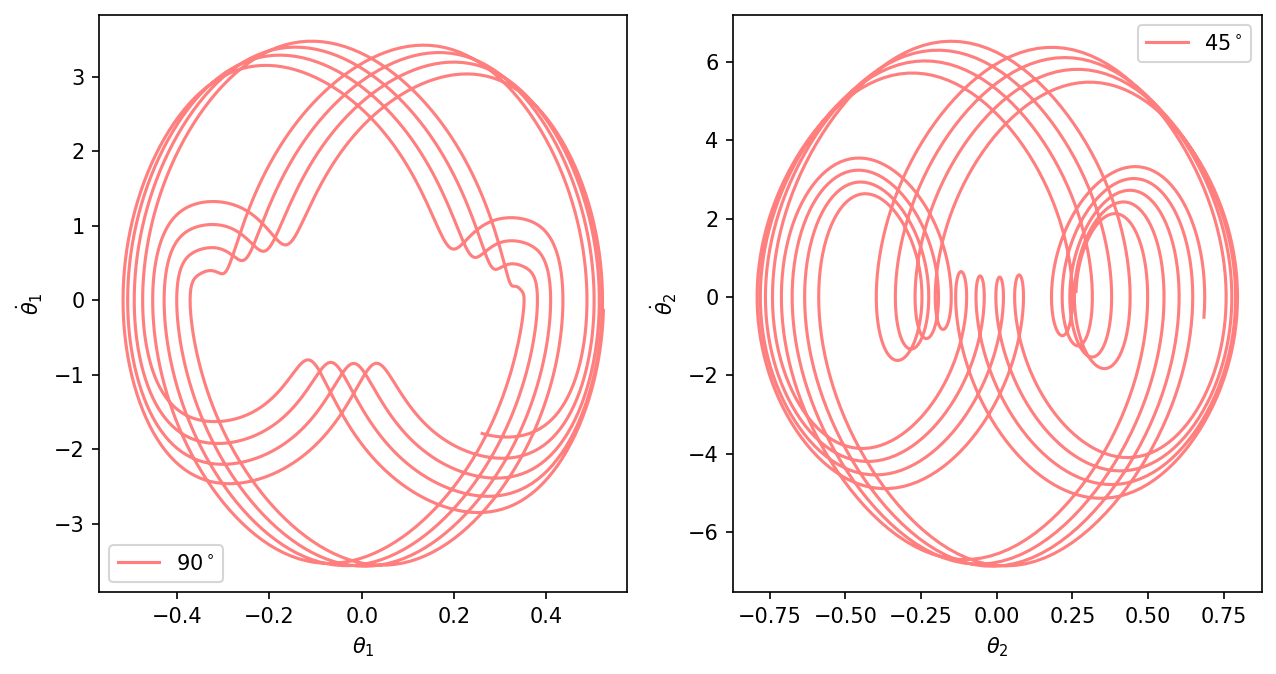

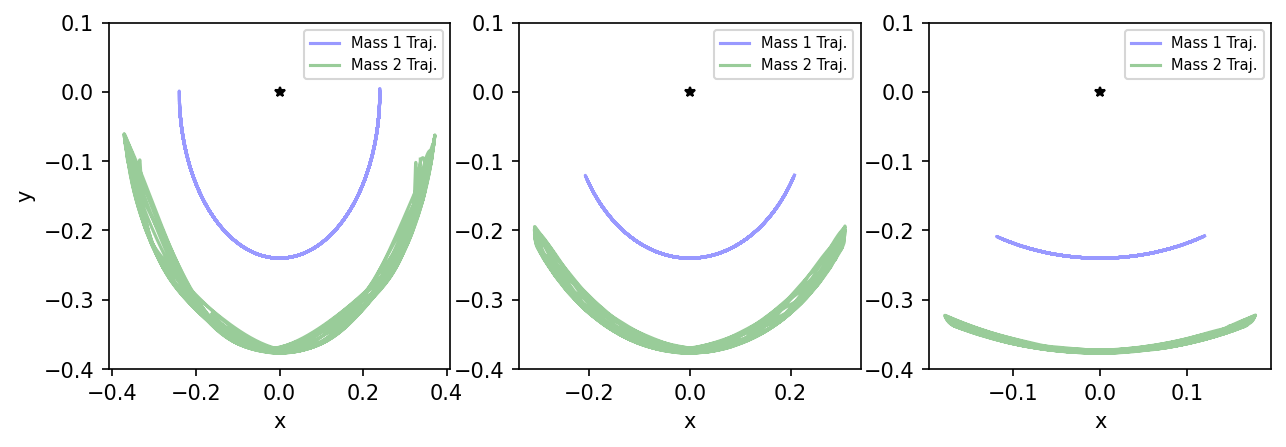

In [ ]:
%cd /content/
!mkdir Case4
%cd /content/Case4
#---------------------FOR TRIAL CASE 4------------------------------------------
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import g

def rk4(y,t,h,derivs): #using rk4 method for solving the DE's of motions
    #function to implement rk4
    #y = [x,v] current state
    #t = current time
    #h = time step
    #derivs = derivative function that defines the problem
    k1,k2,k3,k4 = np.zeros(2),np.zeros(2),np.zeros(2),np.zeros(2)
    k1 = h*derivs(y,t)
    y_halfstep = y + k1/2. #Euler half step using k1
    k2 = h*derivs(y_halfstep,t+h/2)
    y_halfstep = y + k2/2. #Euler half step using k2
    k3 = h*derivs(y_halfstep,t+h/2)
    k4 = h*derivs(y + k3,t+h) #full step using k3
    y_next = y + (k1+2*k2+2*k3+k4)/6.
    return y_next

t = np.linspace(0,3*np.pi,2000)

L1 = 0.240
L2 = 0.137
#m_1 = variable
#m_2 = variable

lamb1 = 1
lamb2 = 1
m_c = 0.2711
m_g = 0.3047

theta_1_list = np.radians(np.array([90,60,30]))
theta_2_list = np.radians(np.array([45,30,15]))

def m1(t):
  return m_c + m_g*(1+lamb1*t)

def m2(t):
  return m_c + m_g*(1+lamb2*t)

def motions(z, t):
    #z = [theta1, theta1dot, theta2, theta2dot]
    delta_theta = z[0] - z[2]
    zp = np.zeros(4)
    zp[0] = z[1]
    zp[1] = (m2(t)*g*np.sin(z[2])*np.cos(delta_theta) - m2(t)*np.sin(delta_theta)*(L1*z[1]**2*np.cos(delta_theta) + L2*z[3]**2) - (m1(t)+m2(t))*g*np.sin(z[0])) / L1 / (m1(t) + m2(t)*np.sin(delta_theta)**2)
    zp[2] = z[3]
    zp[3] = ((m1(t)+m2(t))*(L1*z[1]**2*np.sin(delta_theta) - g*np.sin(z[2]) + g*np.sin(z[0])*np.cos(delta_theta)) + m2(t)*L2*z[3]**2*np.sin(delta_theta)*np.cos(delta_theta)) / L2 / (m1(t) + m2(t)*np.sin(delta_theta)**2)
    return zp

dt = 0.0047
tot_time = 3*np.pi
N = 2000 #int(tot_time/dt)

for n in range(len(theta_1_list)):
  theta_1 = theta_1_list[n]
  theta_2 = theta_2_list[n]
  f = open(f"Final_data_[%i].txt" % n, 'w')
  states = np.zeros((N,4))
  times = np.arange(0,N,dt)
  states[0,:] = [theta_1, 0.0, theta_2, 0.0]

  for i in range(0, N-1):
    states[i+1,:] = rk4(states[i,:],times[i],dt,motions)
    rks=rk4(states[i,:],times[i],dt,motions)
    theta_1,thetadot_1,theta_2,thetadot_2=rks[0],rks[1],rks[2],rks[3]
    string = '%s\t%s\t%s\t%s\n' %(theta_1,thetadot_1,theta_2,thetadot_2)
    f.write(string)
  f.close()

theta_11,thetadot_11,theta_21,thetadot_21 = np.genfromtxt('Final_data_[0].txt', delimiter = '\t', comments = '#', unpack = True) #theta_number_trial
theta_12,thetadot_12,theta_22,thetadot_22 = np.genfromtxt('Final_data_[1].txt', delimiter = '\t', comments = '#', unpack = True)
theta_13,thetadot_13,theta_23,thetadot_23 = np.genfromtxt('Final_data_[2].txt', delimiter = '\t', comments = '#', unpack = True)

x_11 = L1*np.sin(theta_11)
y_11 = -L1*np.cos(theta_11)
x_21 = x_11 + L2*np.sin(theta_21)
y_21 = y_11 - L2*np.cos(theta_21)

x_12 = L1*np.sin(theta_12)
y_12 = -L1*np.cos(theta_12)
x_22 = x_12 + L2*np.sin(theta_22)
y_22 = y_12 - L2*np.cos(theta_22)

x_13 = L1*np.sin(theta_13)
y_13 = -L1*np.cos(theta_13)
x_23 = x_13 + L2*np.sin(theta_23)
y_23 = y_13 - L2*np.cos(theta_23)

fig = plt.figure(figsize=(10,5),dpi=150)
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

#ax1.plot(theta_11,thetadot_11,'b-',ms=1,alpha=0.5)
ax1.set_xlabel("$\\theta_1$", fontsize = 10)
ax1.set_ylabel("$\dot\\theta_1$", fontsize = 10)
#ax2.plot(theta_21,thetadot_21, 'b-', ms = 1, alpha = 0.5)
ax2.set_xlabel("$\\theta_2$")
ax2.set_ylabel("$\dot\\theta_2$")

#ax1.plot(theta_12,thetadot_12,'g-',ms=1,alpha=0.5)
#ax2.plot(theta_22,thetadot_22, 'g-', ms = 1, alpha = 0.5)

ax1.plot(theta_13,thetadot_13,'r-',ms=1,alpha=0.5)
ax2.plot(theta_23,thetadot_23, 'r-', ms = 1, alpha = 0.5)
ax1.legend(['90$^\circ$','60$^\circ$', '30$^\circ$'], loc = 'lower left', fontsize = 10)
ax2.legend(['45$^\circ$', '30$^\circ$', '15$^\circ$'], loc = 'best', fontsize = 10)
plt.savefig('Phase_Space_thetas.png', bbox_inches = 'tight', dpi = 150)

originx, originy = 0,0
fig = plt.figure(figsize=(10,3),dpi=150)
ax1 = fig.add_subplot(131)
ax1.plot(x_11,y_11, 'b-', ms = 1, alpha = 0.4, label = 'Mass 1 Trajectory')
ax1.plot(x_21,y_21, 'g-', ms = 1, alpha = 0.4, label = 'Mass 2 Trajectory')
ax1.plot(originx,originy, color = 'black', marker = '*', ms = 5, label = 'Origin')
ax1.set_ylim(-0.4,0.1)
ax1.set_xlabel('x', fontsize = 10)
ax1.set_ylabel('y', fontsize = 10)
ax1.legend(['Mass 1 Traj.', 'Mass 2 Traj.'], loc = 'best', fontsize = 7)

ax2 = fig.add_subplot(132)
ax2.plot(x_12,y_12, 'b-', ms = 1, alpha = 0.4, label = 'Mass 1 Trajectory')
ax2.plot(x_22,y_22, 'g-', ms = 1, alpha = 0.4, label = 'Mass 2 Trajectory')
ax2.plot(originx,originy, color = 'black', marker = '*', ms = 5, label = 'Origin')
ax2.set_ylim(-0.4,0.1)
ax2.set_xlabel('x', fontsize = 10)
ax2.legend(['Mass 1 Traj.', 'Mass 2 Traj.'], loc = 'best', fontsize = 7)

ax3 = fig.add_subplot(133)
ax3.plot(x_13,y_13, 'b-', ms = 1, alpha = 0.4, label = 'Mass 1 Trajectory')
ax3.plot(x_23,y_23, 'g-', ms = 1, alpha = 0.4, label = 'Mass 2 Trajectory')
ax3.plot(originx,originy, color = 'black', marker = '*', ms = 5, label = 'Origin')
ax3.set_ylim(-0.4,0.1)
ax3.set_xlabel('x', fontsize = 10)
ax3.legend(['Mass 1 Traj.', 'Mass 2 Traj.'], loc = 'best', fontsize = 7)

plt.savefig('DP_Case_1_traj_11.png', bbox_inches = 'tight', dpi = 150)
